In [1]:
pip install pandas numpy matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")


In [3]:
df = pd.read_csv('netflix_titles.csv')
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.info()
df.columns
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


(8807, 12)

In [5]:
df.isnull().sum()


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
df['country'] = df['country'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['director'] = df['director'].fillna('Unknown')


In [14]:
df['type'].value_counts()


type
Movie      6131
TV Show    2676
Name: count, dtype: int64

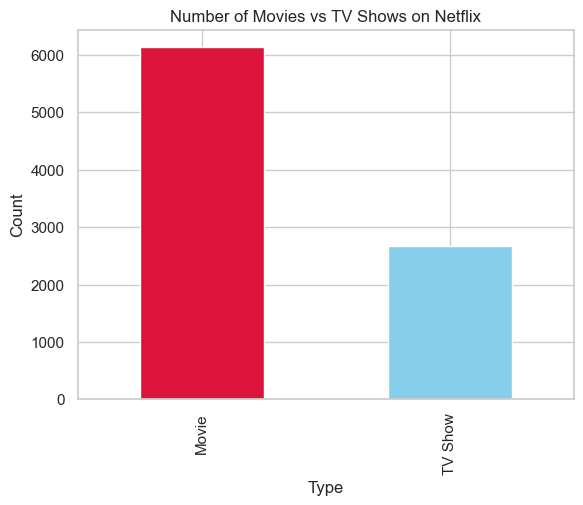

In [16]:
df['type'].value_counts().plot(kind='bar', color=['crimson', 'skyblue'])
plt.title('Number of Movies vs TV Shows on Netflix')
plt.ylabel('Count')
plt.xlabel('Type')
plt.show()


In [18]:
df['country'].value_counts().head(10)


country
United States     2818
India              972
Unknown            831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: count, dtype: int64

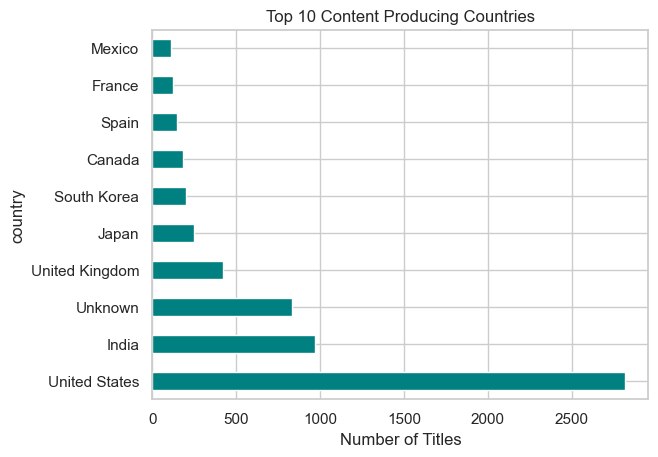

In [20]:
df['country'].value_counts().head(10).plot(kind='barh', color='teal')
plt.title('Top 10 Content Producing Countries')
plt.xlabel('Number of Titles')
plt.show()


In [27]:
df['date_added'].head()


0    September 25, 2021
1    September 24, 2021
2    September 24, 2021
3    September 24, 2021
4    September 24, 2021
Name: date_added, dtype: object

In [35]:
df['date_added'] = df['date_added'].str.strip()


In [37]:
df['date_added'] = pd.to_datetime(df['date_added'])


In [39]:
df['year_added'] = df['date_added'].dt.year


In [41]:
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0


In [43]:
df['year_added'].value_counts().sort_index()


year_added
2008.0       2
2009.0       2
2010.0       1
2011.0      13
2012.0       3
2013.0      11
2014.0      24
2015.0      82
2016.0     429
2017.0    1188
2018.0    1649
2019.0    2016
2020.0    1879
2021.0    1498
Name: count, dtype: int64

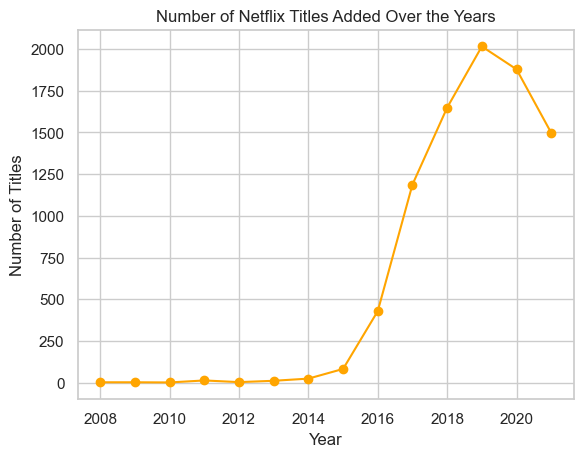

In [47]:
import matplotlib.pyplot as plt

content_per_year.plot(kind='line', marker='o', color='orange')
plt.title('Number of Netflix Titles Added Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()



In [49]:
df['type'].value_counts()


type
Movie      6131
TV Show    2676
Name: count, dtype: int64

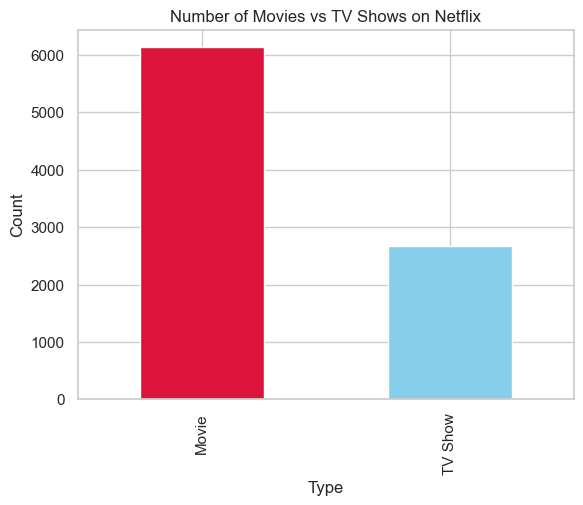

In [51]:
df['type'].value_counts().plot(kind='bar', color=['crimson', 'skyblue'])
plt.title('Number of Movies vs TV Shows on Netflix')
plt.ylabel('Count')
plt.xlabel('Type')
plt.show()


In [53]:
df['country'].value_counts().head(10)


country
United States     2818
India              972
Unknown            831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: count, dtype: int64

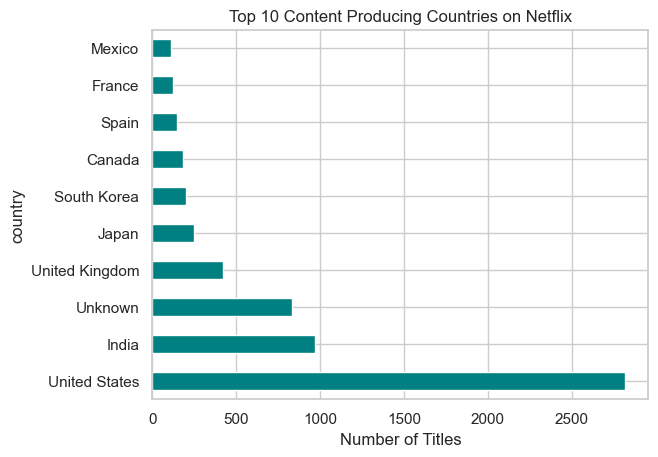

In [55]:
df['country'].value_counts().head(10).plot(kind='barh', color='teal')
plt.title('Top 10 Content Producing Countries on Netflix')
plt.xlabel('Number of Titles')
plt.show()


In [57]:
df['rating'].value_counts().head(10)


rating
TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
NR         80
Name: count, dtype: int64

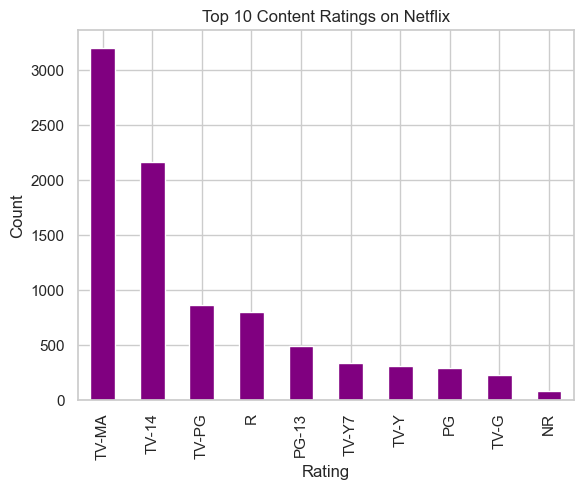

In [59]:
df['rating'].value_counts().head(10).plot(kind='bar', color='purple')
plt.title('Top 10 Content Ratings on Netflix')
plt.ylabel('Count')
plt.xlabel('Rating')
plt.show()


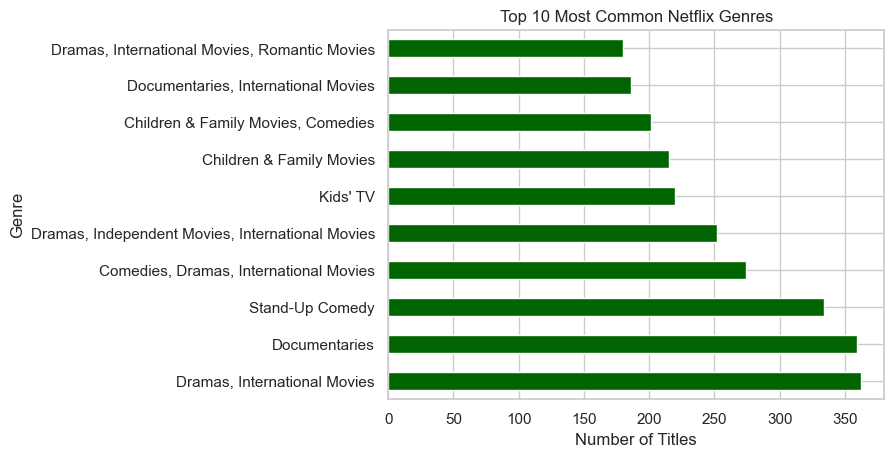

In [62]:
df['listed_in'].value_counts().head(10).plot(kind='barh', color='darkgreen')
plt.title('Top 10 Most Common Netflix Genres')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()


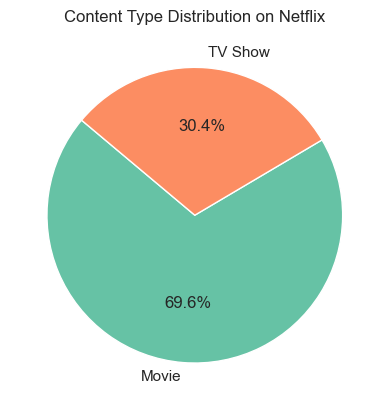

In [64]:
df['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['#66c2a5','#fc8d62'])
plt.title('Content Type Distribution on Netflix')
plt.ylabel('')
plt.show()


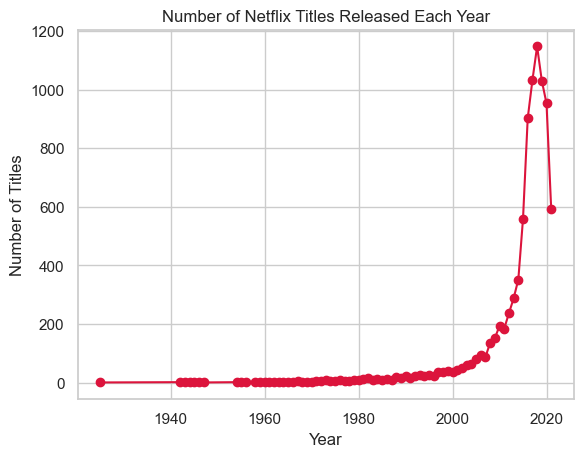

In [66]:
df['release_year'].value_counts().sort_index().plot(kind='line', marker='o', color='crimson')
plt.title('Number of Netflix Titles Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()


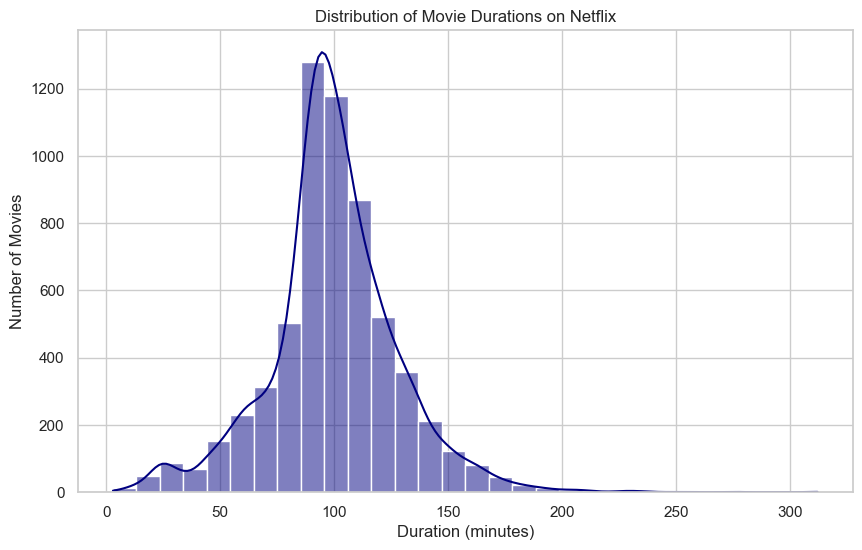

In [78]:
movie_df = df[df['type'] == 'Movie'].copy()

movie_df['duration'] = movie_df['duration'].str.replace(' min','').astype(float)

plt.figure(figsize=(10,6))
sns.histplot(movie_df['duration'], bins=30, color='navy', kde=True)
plt.title('Distribution of Movie Durations on Netflix')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.show()


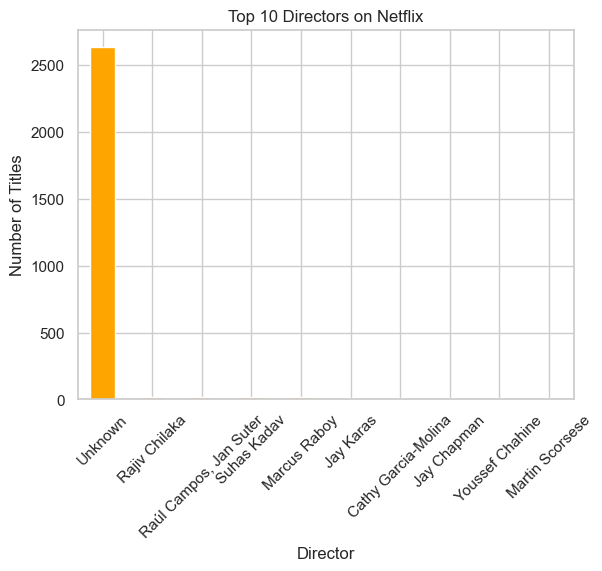

In [70]:
df['director'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Directors on Netflix')
plt.ylabel('Number of Titles')
plt.xlabel('Director')
plt.xticks(rotation=45)
plt.show()


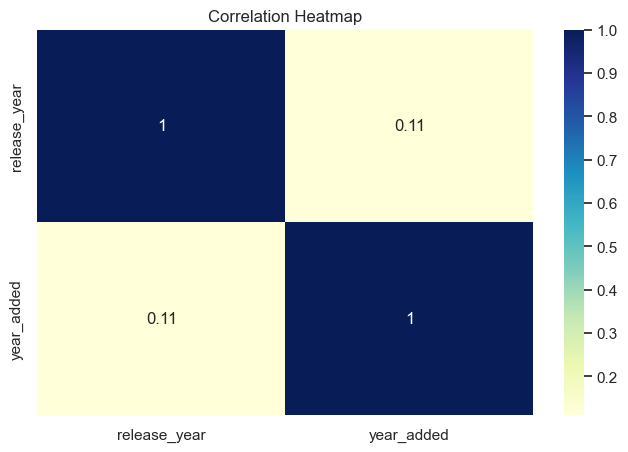

In [76]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Now plot heatmap
plt.figure(figsize=(8,5))
sns.heatmap(numeric_df.corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Heatmap')
plt.show()


Insights Summary

What type of content dominates Netflix?

Which genres are most common?

Which years had peak releases?

How do movie durations generally look?

Who are the most prolific directors?